In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
horizontal_latency_file = '../../results-with-loadbalancer/results-horizontal-latency-2-lb/exp1_21_4_generic_Latency_1.csv'
vertical_latency_file = '../../results-with-loadbalancer/results-vertical-latency-1-lb/exp2_21_2000_generic_Latency_1.csv'
horizontal_ui_latency_file = '../../results-with-loadbalancer/results-horizontal-uiLatency-1-lb/exp0_11_4_generic_uiLatency_1.csv'
vertical_ui_latency_file = '../../results-with-loadbalancer/results-vertical-uiLatency-1-lb/exp3_11_1000_generic_uiLatency_1.csv'

In [95]:
def analyze_latency(horizontal_file, vertical_file, threshold=500, requirement=200):
    df_latency_horizontal = pd.read_csv(horizontal_file)
    df_latency_vertical = pd.read_csv(vertical_file)

    # Filter the data to exclude any outliers
    df_latency_horizontal_filtered = df_latency_horizontal[df_latency_horizontal['value'] <= threshold]
    df_latency_vertical_filtered = df_latency_vertical[df_latency_vertical['value'] <= threshold]

    # Calculate the 95th percentile latency for both horizontal and vertical scaling
    percentile_95_latency_horizontal = df_latency_horizontal_filtered['value'].quantile(0.95)
    percentile_95_latency_vertical = df_latency_vertical_filtered['value'].quantile(0.95)

    print(f"95th Percentile Latency for Horizontal: {percentile_95_latency_horizontal} ms")
    print(f"95th Percentile Latency for Vertical: {percentile_95_latency_vertical} ms")

    # Check if the requirements are met
    horizontal_requirement_met = percentile_95_latency_horizontal <= requirement
    vertical_requirement_met = percentile_95_latency_vertical <= requirement

    print(f"Horizontal Requirement Met: {horizontal_requirement_met}")
    print(f"Vertical Requirement Met: {vertical_requirement_met}")

    return {
        "df_latency_horizontal_filtered": df_latency_horizontal_filtered,
        "df_latency_vertical_filtered": df_latency_vertical_filtered,
        "percentile_95_latency_horizontal": percentile_95_latency_horizontal,
        "percentile_95_latency_vertical": percentile_95_latency_vertical,
        "horizontal_requirement_met": horizontal_requirement_met,
        "vertical_requirement_met": vertical_requirement_met
    }

In [96]:
def plot_latency_comparison(df_latency_horizontal_filtered, df_latency_vertical_filtered, threshold=500, title = 'Latency comparision'):
    if 'value' in df_latency_horizontal_filtered.columns and 'value' in df_latency_vertical_filtered.columns:
        plt.figure(figsize=(10, 6))
        plt.boxplot([df_latency_horizontal_filtered['value'], df_latency_vertical_filtered['value']], labels=['Horizontal', 'Vertical'])
        plt.title(title)
        plt.ylabel('Latency (ms)')
        plt.ylim(0, threshold)
        plt.show()
    else:
        print("Value column not found in one of the DataFrames.")


In [97]:
latency_results = analyze_latency(horizontal_latency_file, vertical_latency_file)

ui_latency_results = analyze_latency(horizontal_ui_latency_file, vertical_ui_latency_file)


95th Percentile Latency for Horizontal: 361.5314150473012 ms
95th Percentile Latency for Vertical: 153.51337773848417 ms
Horizontal Requirement Met: False
Vertical Requirement Met: True
95th Percentile Latency for Horizontal: 424.2256637168142 ms
95th Percentile Latency for Vertical: 233.67875647668387 ms
Horizontal Requirement Met: False
Vertical Requirement Met: False


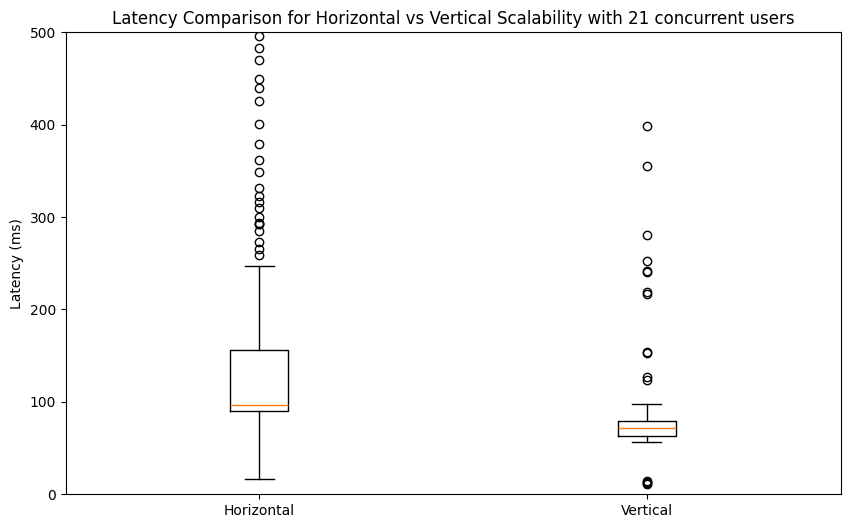

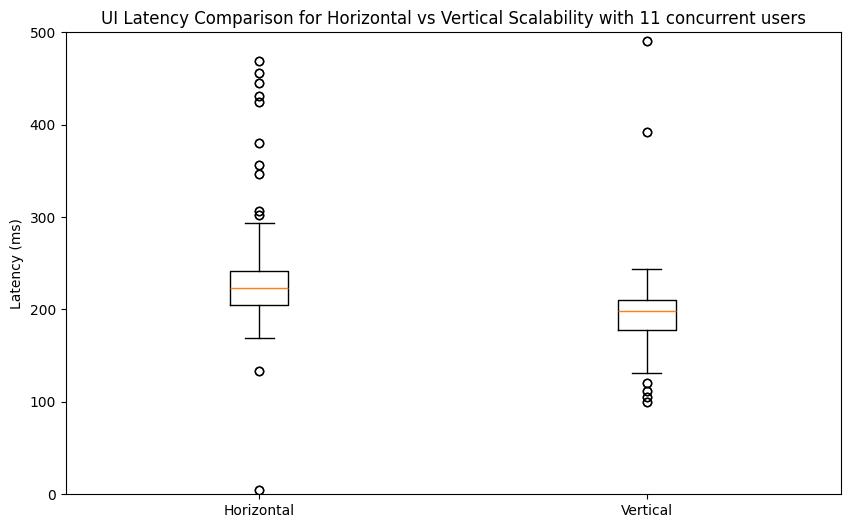

In [98]:

plot_latency_comparison(latency_results['df_latency_horizontal_filtered'], latency_results['df_latency_vertical_filtered'], title='Latency Comparison for Horizontal vs Vertical Scalability with 21 concurrent users')
plot_latency_comparison(ui_latency_results['df_latency_horizontal_filtered'], ui_latency_results['df_latency_vertical_filtered'], title='UI Latency Comparison for Horizontal vs Vertical Scalability with 11 concurrent users')

